# Assignment 02

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Data import Data
from kNN import kNN

In [3]:
pd.options.display.precision = 4

The distance functions to be used in kNN.
<br>
For $cosine \: similarity$, the distance measure used is $1 - cosine \: similarity$

In [4]:
def l2norm(p):
    return np.sqrt(np.sum(p ** 2))


def euclidean_dist(p1, p2):
    return l2norm(p1 - p2)


def cosine_dist(p1, p2):
    sim = np.dot(p1, p2) / (l2norm(p1) * l2norm(p2))
    return 1 - sim

Read the iris dataset and create a $60/20/20$ split for train/dev/test data using 5-fold cross validation.
<br>
See [Data.py](Data.py)

In [5]:
data_sets = list(Data.read('iris.data', 5, 0.75))

print(f'Train Data       = {data_sets[0].train.shape}')
print(f'Development Data = {data_sets[0].dev.shape}')
print(f'Test Data        = {data_sets[0].test.shape}')

Train Data       = (90, 5)
Development Data = (30, 5)
Test Data        = (30, 5)


Create models for the 3 distance measures:
- Euclidean
- Normalized Euclidean
- Cosine

See [kNN.py](kNN.py)

In [6]:
all_models = {
    'euclidean': [],
    'normalized euclidean': [],
    'cosine': [],
}
for data in data_sets:
    all_models['euclidean'].append(kNN(data, euclidean_dist))
    all_models['normalized euclidean'].append(kNN(data.normalized(), euclidean_dist))
    all_models['cosine'].append(kNN(data, cosine_dist))

In [7]:
hyper_params = [1, 3, 5, 7]

Calculate the average accuracy for each value of $k$ in each model by testing development data against train data.
<br>
See [kNN.py](kNN.py) for `k_accuracy()`

In [8]:
accuracy = pd.DataFrame(columns=all_models.keys(), index=hyper_params)
for mdl_name, models in all_models.items():
    for k in hyper_params:
        accuracies = [mdl.k_accuracy(k) for mdl in models]
        accuracy.at[k, mdl_name] = np.average(accuracies)

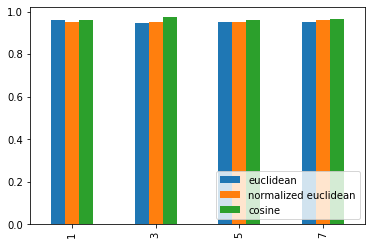

In [9]:
accuracy.plot.bar()
plt.legend(loc='lower right')
plt.show()

In [10]:
accuracy

euclidean normalized euclidean  cosine
1      0.96               0.9533    0.96
3    0.9467               0.9533  0.9733
5    0.9533               0.9533    0.96
7    0.9533                 0.96  0.9667

Calculate the final accuracy against test data.

In [11]:
final_accuracy = pd.DataFrame(columns=all_models.keys(), index=hyper_params)
for mdl_name, models in all_models.items():
    for k in hyper_params:
        accuracies = [mdl.final_accuracy(k) for mdl in models]
        final_accuracy.at[k, mdl_name] = np.average(accuracies)

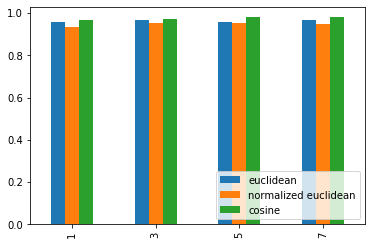

In [12]:
final_accuracy.plot.bar()
plt.legend(loc='lower right')
plt.show()

In [13]:
final_accuracy

euclidean normalized euclidean  cosine
1      0.96               0.9333  0.9667
3    0.9667               0.9533  0.9733
5      0.96               0.9533    0.98
7    0.9667               0.9467    0.98

The best accuracy found during hyper-parameter optimization is not perfectly consistent with the best final accuracy found.